In [10]:
import torch

from utils import get_last_checkpoint_path, Config

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [11]:
config = Config('config.yaml')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

last_checkpoint_path = get_last_checkpoint_path(config=config)
print(last_checkpoint_path)
state = torch.load(f=last_checkpoint_path, map_location=torch.device(device))


weights/epoch_09.pt


In [12]:
print(
    state['encoder_self_attention_scores_layer_0'].shape,
    state['decoder_self_attention_scores_layer_0'].shape,
    state['decoder_cross_attention_scores_layer_0'].shape
)

torch.Size([1, 8, 250, 250]) torch.Size([1, 8, 58, 58]) torch.Size([1, 8, 58, 250])


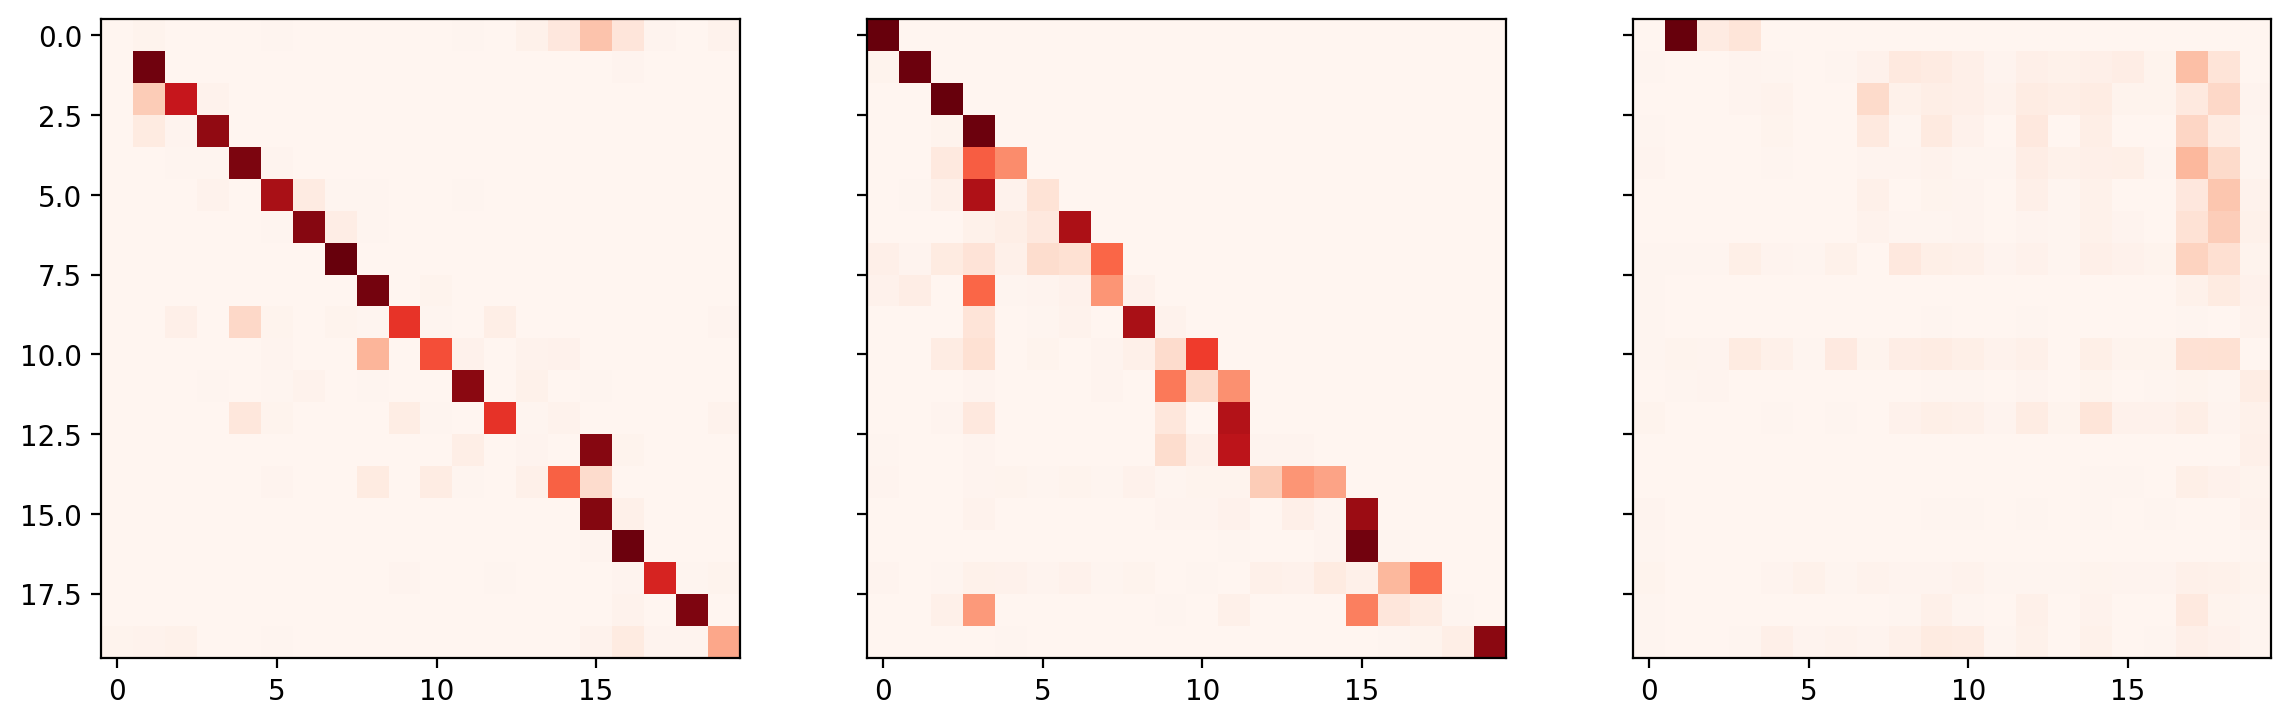

In [15]:
example = 0 # sequence to select (0, config.BATCH_SIZE) 
head = 5 # head to select (0, config.HEADS) 

enc_self_att = state['encoder_self_attention_scores_layer_0'][example, head][:20,:20]
dec_self_att = state['decoder_self_attention_scores_layer_0'][example, head][:20,:20]
dec_cross_att = state['decoder_cross_attention_scores_layer_0'][example, head][:20,:20]

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14,6))
axes[0].imshow(enc_self_att, cmap='Reds', interpolation=None)
axes[1].imshow(dec_self_att, cmap='Reds', interpolation=None)
axes[2].imshow(dec_cross_att, cmap='Reds', interpolation=None);
